# Data Science - Project 1: CRISP DM_Blog Post 
### Sep 2019

### Context

##### Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. 

### Data source: 
#### Boston AirBnB (https://www.kaggle.com/airbnb/boston)
#### As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA. 

##### Listings: including full descriptions and average review score 
##### Reviews: including unique listing id for each reviewer and detailed comments
##### Calendar: including listing id, the price and tand availability for that day (2016/09 -2017/09)
 

### Purpose:
#### This analysis is to find the most important features of Boston's AirBnB market upon the given period. It could help either the visitor or the potential host to make correct decision. Basically, it will look into the data and answer where, when and what are the best target if any vacation or investment is in plan.


### Questions:
###### 1. Where to stay: Does location really drive your first choice or think more? Does the room impact decion as well? Does location in line with ratings?  
###### 2. When to visit:  Timing: Does season or event really matter? Does the price echo the demanding?   
###### 3. What to expect: Is the cost of stay associated with rating/room/etc? How to save some money?


# Prepare data

### Data source

In [1]:
# import packages

import datetime 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
# common function

def remove_dollar(x):
    if type(x) is str:
        x = float(x.replace('$','').replace(',', ''))
    return x


### Load data: Calendar

In [3]:
# [1] Calendar: listing id, the price and tand availability for that day
"""
Note: 
1.Each id has all dates
2.If price is missing, meaning the room on the day not available
""" 

df_calendar_in = pd.read_csv(r'.\Data\boston-airbnb-open-data\calendar.csv')

print(df_calendar_in.shape)
print(df_calendar_in.dtypes)
df_calendar_in.head()

(1308890, 4)
listing_id     int64
date          object
available     object
price         object
dtype: object


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
df_calendar_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
# Data clean up 
# remove $ in price

df_calendar = df_calendar_in.copy()

df_calendar['price_cleansed'] = df_calendar['price'].apply(remove_dollar)
df_calendar = df_calendar.drop(['price'], axis =1)
df_calendar['date'] = pd.to_datetime(df_calendar['date'])  
df_calendar['month'] = df_calendar['date'].apply(lambda x: x.month)
df_calendar['weekday'] = df_calendar['date'].apply(lambda x: x.strftime("%A"))
df_calendar['available_count'] = np.where(df_calendar['available'] == 't',1, 0)

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
df_calendar['weekday_id'] = df_calendar['weekday'].map(sorterIndex)

df_calendar.head(10)


,listing_id,date,available,price_cleansed,month,weekday,available_count,weekday_id
0,12147973,2017-09-05,f,NaN,9,Tuesday,0,2
1,12147973,2017-09-04,f,NaN,9,Monday,0,1
2,12147973,2017-09-03,f,NaN,9,Sunday,0,0
3,12147973,2017-09-02,f,NaN,9,Saturday,0,6
4,12147973,2017-09-01,f,NaN,9,Friday,0,5
5,12147973,2017-08-31,f,NaN,8,Thursday,0,4
6,12147973,2017-08-30,f,NaN,8,Wednesday,0,3
7,12147973,2017-08-29,f,NaN,8,Tuesday,0,2
8,12147973,2017-08-28,f,NaN,8,Monday,0,1
9,12147973,2017-08-27,f,NaN,8,Sunday,0,0


In [6]:
# check values
print('Distribution of availability : \n', df_calendar.groupby(by = ['available'])['listing_id'].count())
# How many listings in total
print('Total properties :', df_calendar['listing_id'].nunique())
# check the range of time
print('Listing range :', df_calendar['date'].min(), df_calendar['date'].max())
# check the price
print('Price range :', df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].min(), df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].max())


Distribution of availability : 
 available
f    665853
t    643037
Name: listing_id, dtype: int64
Total properties : 3585
Listing range : 2016-09-06 00:00:00 2017-09-05 00:00:00
Price range : 11.0 7163.0


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


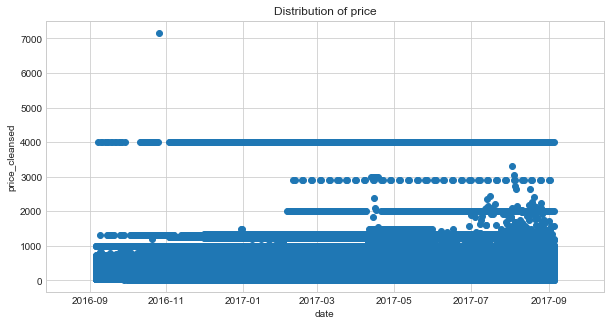

In [7]:
# Pricing distribution

plt.figure(figsize = (10, 5))
plt.scatter( 'date', 'price_cleansed', data =df_calendar  )
plt.title("Distribution of price")
plt.xlabel("date")
plt.ylabel("price_cleansed") 
#plt.axis((df_calendar['date'].min(), df_calendar['date'].max(),df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].min(),df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].max()+100))

plt.show()

In [8]:
# remove outlier

print(df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].max())

df_calendar[df_calendar['price_cleansed']>=4000].groupby(['listing_id']).count()

7163.0


,date,available,price_cleansed,month,weekday,available_count,weekday_id
listing_id,,,,,,,
447826,1,1,1,1,1,1,1
12972378,336,336,336,336,336,336,336


In [9]:
df_calendar = df_calendar[~ (df_calendar['price_cleansed'] >=4000)]
print(df_calendar.shape)

(1308553, 8)


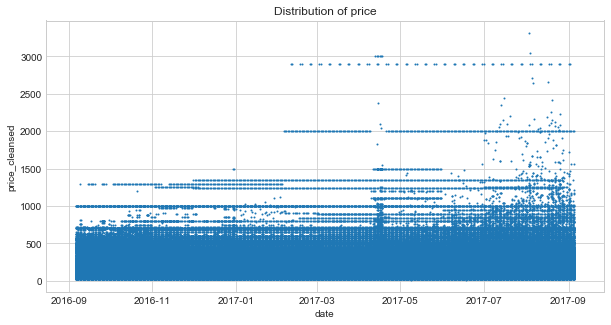

In [10]:

plt.figure(figsize = (10, 5))
s= 1
plt.scatter( 'date', 'price_cleansed', data =df_calendar ,s = s )
plt.title("Distribution of price")
plt.xlabel("date")
plt.ylabel("price_cleansed") 
# plt.axis((df_calendar['date'].min(), df_calendar['date'].max(),df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].min(),df_calendar[df_calendar['price_cleansed'].notnull()]['price_cleansed'].max()+100))
 
plt.show()

### Load data: Listing

In [11]:
# [2] Listing: unique listing with all the details of the property, rules, price

df_listing_in = pd.read_csv(r'.\Data\boston-airbnb-open-data\listings.csv')
print(df_listing_in.shape)
df_listing_in.head(2)


(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [12]:
# check the columns
df_listing_in.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [13]:
# clean up

"""
Key attributes:  
""" 

attkeep = ['id', 'property_type',  'room_type',  'neighbourhood_cleansed',  'latitude', 'longitude',  'zipcode',
            'host_id',  'host_since', 'host_listings_count',  'calculated_host_listings_count', 'host_response_rate',  
            'price',  'minimum_nights',  'maximum_nights',  'reviews_per_month',  'accommodates',  'guests_included',  
            'number_of_reviews',  'reviews_per_month',  'review_scores_value',  'first_review',  'last_review' , 
            'review_scores_rating' , 'review_scores_accuracy' , 'review_scores_cleanliness','review_scores_checkin' , 
            'review_scores_communication' , 'review_scores_location', 'review_scores_value' 
          ]


df_listing = df_listing_in[attkeep].copy()
    
def remove_perc(x):
    if type(x) is str:
        x = float(x.replace('%','').replace(','',  '''))
    return x

df_listing.rename (columns = {'id': 'listing_id'} ,   inplace = True)

df_listing['list_price_cleansed'] = df_listing['price'].apply(remove_dollar) 
df_listing.head()

,listing_id,property_type,room_type,neighbourhood_cleansed,latitude,longitude,zipcode,host_id,host_since,host_listings_count,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,list_price_cleansed
0,12147973,House,Entire home/apt,Roslindale,42.282619,-71.133068,02131,31303940,2015-04-15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0
1,3075044,Apartment,Private room,Roslindale,42.286241,-71.134374,02131,2572247,2012-06-07,1,...,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,65.0
2,6976,Apartment,Private room,Roslindale,42.292438,-71.135765,02131,16701,2009-05-11,1,...,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,65.0
3,1436513,House,Private room,Roslindale,42.281106,-71.121021,NaN,6031442,2013-04-21,1,...,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75.0
4,7651065,House,Private room,Roslindale,42.284512,-71.136258,02131,15396970,2014-05-11,1,...,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,79.0


In [14]:
# How many listings in total
print('Total properties :', df_listing['listing_id'].nunique())

Total properties : 3585


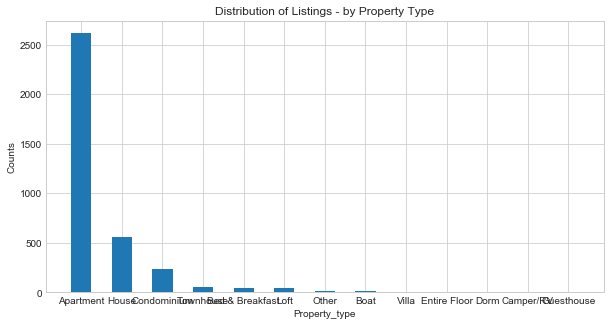

In [15]:
df_listing_byproperty = df_listing.groupby ([ 'property_type' ])['listing_id'].count().reset_index().sort_values(by = ['listing_id'] , ascending = [False])
df_listing_byproperty.rename (columns = {'listing_id': 'total'}, inplace = True)

plt.figure(figsize = (10, 5))
width = 0.5
plt.bar( 'property_type', 'total', data = df_listing_byproperty , width = width )
plt.title("Distribution of Listings - by Property Type")
plt.xlabel("Property_type")
plt.ylabel("Counts")  
plt.show()

In [16]:
df_listing.pivot_table(values = ['listing_id'], index = [ 'property_type' ], columns =['accommodates'], aggfunc = 'count')

listing_id                                                  \
accommodates            1       2      3      4      5      6     7     8    
property_type                                                                
Apartment            285.0  1043.0  342.0  515.0  204.0  142.0  26.0  35.0   
Bed & Breakfast        5.0    30.0    3.0    2.0    NaN    NaN   NaN   1.0   
Boat                   NaN     1.0    NaN    1.0    1.0    7.0   1.0   NaN   
Camper/RV              NaN     NaN    NaN    NaN    NaN    NaN   1.0   NaN   
Condominium           22.0    85.0   29.0   56.0   13.0   20.0   2.0   3.0   
Dorm                   NaN     1.0    1.0    NaN    NaN    NaN   NaN   NaN   
Entire Floor           NaN     2.0    NaN    NaN    NaN    2.0   NaN   NaN   
Guesthouse             NaN     NaN    NaN    1.0    NaN    NaN   NaN   NaN   
House                110.0   258.0   45.0   49.0   27.0   30.0   7.0  16.0   
Loft                   3.0    16.0    6.0   13.0    NaN    NaN   1.0   NaN   
Other                  4.0     9.0    NaN    4.0    NaN    NaN   NaN   NaN   
Townhouse              8.0    35.0    2.0    5.0    NaN    2.0   1.0   NaN   
Villa                  1.0     1.0    NaN    4.0    NaN    NaN   NaN   NaN   

                                               
accommodates      9    10   11   12   14   16  
property_type                                  
Apartment        6.0  8.0  2.0  3.0  1.0  NaN  
Bed & Breakfast  NaN  NaN  NaN  NaN  NaN  NaN  
Boat             NaN  1.0  NaN  NaN  NaN  NaN  
Camper/RV        NaN  NaN  NaN  NaN  NaN  NaN  
Condominium      NaN  1.0  NaN  NaN  NaN  NaN  
Dorm             NaN  NaN  NaN  NaN  NaN  NaN  
Entire Floor     NaN  NaN  NaN  NaN  NaN  NaN  
Guesthouse       NaN  NaN  NaN  NaN  NaN  NaN  
House            4.0  9.0  2.0  2.0  1.0  2.0  
Loft             NaN  NaN  NaN  NaN  NaN  NaN  
Other            NaN  NaN  NaN  NaN  NaN  NaN  
Townhouse        NaN  NaN  NaN  NaN  1.0  NaN  
Villa            NaN  NaN  NaN  NaN  NaN  NaN

In [17]:
df_listing.pivot_table(values = ['listing_id'], index = [ 'property_type' ], columns =['minimum_nights'], aggfunc = 'count')


listing_id                                                   \
minimum_nights         1      2      3     4     5     6      7    8    9     
property_type                                                                 
Apartment            977.0  721.0  485.0  89.0  72.0  13.0  102.0  1.0  2.0   
Bed & Breakfast       20.0   15.0    2.0   2.0   NaN   NaN    1.0  NaN  NaN   
Boat                   3.0    9.0    NaN   NaN   NaN   NaN    NaN  NaN  NaN   
Camper/RV              1.0    NaN    NaN   NaN   NaN   NaN    NaN  NaN  NaN   
Condominium           92.0   66.0   43.0   8.0   6.0   2.0    3.0  NaN  NaN   
Dorm                   2.0    NaN    NaN   NaN   NaN   NaN    NaN  NaN  NaN   
Entire Floor           3.0    1.0    NaN   NaN   NaN   NaN    NaN  NaN  NaN   
Guesthouse             NaN    NaN    1.0   NaN   NaN   NaN    NaN  NaN  NaN   
House                276.0  152.0   64.0  20.0  13.0   3.0   16.0  NaN  NaN   
Loft                  17.0   10.0    9.0   2.0   1.0   NaN    NaN  NaN  NaN   
Other                  5.0    8.0    1.0   1.0   1.0   NaN    1.0  NaN  NaN   
Townhouse             26.0   14.0    8.0   4.0   2.0   NaN    NaN  NaN  NaN   
Villa                  3.0    1.0    1.0   NaN   NaN   NaN    1.0  NaN  NaN   

                       ...                                                     
minimum_nights    10   ...  25   27   28    30   32   60   90   200  273  300  
property_type          ...                                                     
Apartment        60.0  ...  3.0  2.0  5.0  21.0  3.0  4.0  2.0  1.0  NaN  NaN  
Bed & Breakfast   NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  1.0  
Boat              NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Camper/RV         NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Condominium       NaN  ...  NaN  NaN  2.0   2.0  1.0  NaN  NaN  NaN  NaN  NaN  
Dorm              NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Entire Floor      NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Guesthouse        NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
House             5.0  ...  NaN  NaN  NaN   6.0  NaN  NaN  NaN  NaN  1.0  NaN  
Loft              NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Other             NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Townhouse         NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Villa             NaN  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[13 rows x 29 columns]

In [18]:
df_listing.pivot_table(values = ['listing_id'], index = [  'neighbourhood_cleansed' ], aggfunc = 'count').reset_index().sort_values(['listing_id'])

,neighbourhood_cleansed,listing_id
13,Leather District,5
14,Longwood Medical Area,9
15,Mattapan,24
2,Bay Village,24
11,Hyde Park,31
24,West Roxbury,46
23,West End,49
18,Roslindale,56
6,Chinatown,71
21,South Boston Waterfront,83


In [19]:
# group the property type, neiborhood <30, accommodates > 7

def group_property(row):
    if row['property_type'] in(['Boat', 'Camper/RV', 'Villa', 'Dorm', 'Entire Floor', 'Guesthouse']) :
        return 'Other'
    else:
        return row['property_type']

def group_neighbourhood(row):
    if row['neighbourhood_cleansed'] in([  'Leather District', 'Longwood Medical Area',  'Mattapan', 'Bay Village' ]) :
        return 'Other'
    else:
        return row['neighbourhood_cleansed']
    
def group_accommodates(row):
    if row['accommodates'] >=7 :
        return '7+'
    else:
        return str(row['accommodates'])

df_listing['property_type_grouped'] = df_listing.apply(group_property, axis = 1)
df_listing['neighbourhood_cleansed_grouped'] = df_listing.apply(group_neighbourhood, axis = 1)
df_listing['accommodates_cleansed'] = df_listing.apply(group_accommodates, axis = 1)


In [20]:
df_listing.pivot_table(values = ['listing_id'], index = ['neighbourhood_cleansed_grouped'], columns =['property_type_grouped' ], aggfunc = 'count') 

listing_id                                    \
property_type_grouped           Apartment Bed & Breakfast Condominium House   
neighbourhood_cleansed_grouped                                                
Allston                             177.0             NaN         8.0  71.0   
Back Bay                            271.0             NaN        20.0   2.0   
Beacon Hill                         174.0             3.0        11.0   4.0   
Brighton                            121.0             2.0         8.0  46.0   
Charlestown                          66.0             3.0        16.0  21.0   
Chinatown                            66.0             NaN         1.0   NaN   
Dorchester                          161.0             4.0        14.0  82.0   
Downtown                            146.0             2.0         5.0   2.0   
East Boston                         108.0             NaN        12.0  22.0   
Fenway                              276.0             3.0         9.0   2.0   
Hyde Park                             7.0             1.0         1.0  21.0   
Jamaica Plain                       192.0            10.0        29.0  98.0   
Mission Hill                         95.0             NaN         5.0  18.0   
North End                           121.0             NaN         8.0   5.0   
Other                                26.0             4.0         7.0  22.0   
Roslindale                           17.0             NaN         6.0  32.0   
Roxbury                              95.0             3.0         4.0  38.0   
South Boston                         91.0             NaN        32.0  37.0   
South Boston Waterfront              74.0             NaN         3.0   1.0   
South End                           266.0             6.0        30.0   9.0   
West End                             47.0             NaN         2.0   NaN   
West Roxbury                         15.0             NaN         NaN  29.0   

                                                     
property_type_grouped          Loft Other Townhouse  
neighbourhood_cleansed_grouped                       
Allston                         1.0   1.0       1.0  
Back Bay                        4.0   2.0       2.0  
Beacon Hill                     NaN   NaN       2.0  
Brighton                        1.0   2.0       5.0  
Charlestown                     NaN   2.0       3.0  
Chinatown                       4.0   NaN       NaN  
Dorchester                      1.0   1.0       6.0  
Downtown                        6.0  10.0       NaN  
East Boston                     NaN   5.0       3.0  
Fenway                          NaN   NaN       NaN  
Hyde Park                       1.0   NaN       NaN  
Jamaica Plain                   2.0   1.0      11.0  
Mission Hill                    5.0   NaN       1.0  
North End                       3.0   5.0       1.0  
Other                           1.0   1.0       1.0  
Roslindale                      NaN   1.0       NaN  
Roxbury                         1.0   1.0       2.0  
South Boston                    1.0   7.0       6.0  
South Boston Waterfront         4.0   1.0       NaN  
South End                       4.0   3.0       8.0  
West End                        NaN   NaN       NaN  
West Roxbury                    NaN   NaN       2.0

In [21]:
df_listing.pivot_table(values = ['listing_id'], index = [ 'property_type_grouped' ], columns =['accommodates_cleansed'], aggfunc = 'count')

listing_id                                          
accommodates_cleansed          1       2      3      4      5      6    7+
property_type_grouped                                                     
Apartment                  285.0  1043.0  342.0  515.0  204.0  142.0  81.0
Bed & Breakfast              5.0    30.0    3.0    2.0    NaN    NaN   1.0
Condominium                 22.0    85.0   29.0   56.0   13.0   20.0   6.0
House                      110.0   258.0   45.0   49.0   27.0   30.0  43.0
Loft                         3.0    16.0    6.0   13.0    NaN    NaN   1.0
Other                        5.0    14.0    1.0   10.0    1.0    9.0   3.0
Townhouse                    8.0    35.0    2.0    5.0    NaN    2.0   2.0

Nb of listing : Minimum, 1, maximum, 136


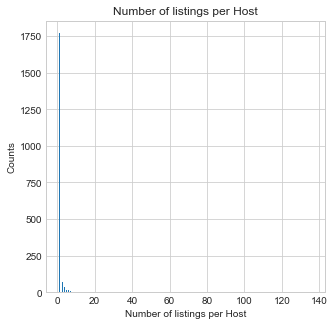

In [22]:
# multiiple listing hosts

#print(df_listing['calculated_host_listings_count'].isnull().sum())

df_listing_host = df_listing[[ 'host_id', 'calculated_host_listings_count']].sort_values(by= ['host_id']).reset_index(drop = True) 
df_listing_host = df_listing_host.drop_duplicates(['host_id'], keep ='first').reset_index(drop = True) 
print(('Nb of listing : Minimum, {}, maximum, {}').format(df_listing_host['calculated_host_listings_count'].min(), df_listing_host['calculated_host_listings_count'].max()))


df_listing_host_byhost = df_listing_host.groupby(['calculated_host_listings_count'])['host_id'].count().reset_index()
df_listing_host_byhost.rename (columns = {'host_id': 'total'}, inplace = True)
# df_listing_host_byhost

plt.figure(figsize = (5, 5))
width = 0.5
plt.bar( 'calculated_host_listings_count', 'total', data =df_listing_host_byhost, width = width )
plt.title("Number of listings per Host")
plt.xlabel("Number of listings per Host")
plt.ylabel("Counts")  
plt.show()

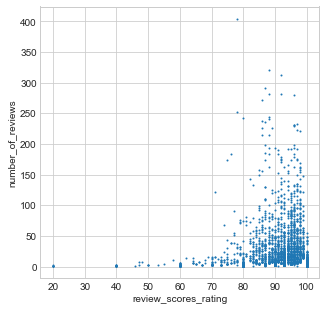

In [23]:
# the average reviews
 
plt.figure(figsize = (5, 5))
s = 1
plt.scatter( 'review_scores_rating', 'number_of_reviews', data =df_listing, s=s  )
# plt.title("Number of listings per Host")
plt.xlabel("review_scores_rating")
plt.ylabel("number_of_reviews")  
plt.show()

### Load data: Reviews

In [24]:
# [3] Review: 
# used as demanding/activities

df_reviews_in = pd.read_csv(r'.\Data\boston-airbnb-open-data\reviews.csv')
print(df_reviews_in.shape)
df_reviews_in.head()

(68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [25]:
# check comment field type

# df_reviews['comments'].dtype
# ib = df_reviews['comments']
# t = type('12')
# t
# for idx,i in enumerate(ib):
#     if(type(i) != t):
#         print (idx,type(i) )

# df_reviews[df_reviews.index == 41931]


In [26]:
df_reviews = df_reviews_in.copy()

df_reviews.rename (columns = {'id' : 'review_id'}, inplace = True )
df_reviews['comments'] = df_reviews['comments'].fillna('').astype(str)
df_reviews = df_reviews[ df_reviews['comments'] != 'This is an automated posting.'  ]

print(df_reviews.shape)
df_reviews.head()

(68275, 6)


,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [27]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
review_id        68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68275 non-null object
dtypes: int64(3), object(3)
memory usage: 3.6+ MB


In [28]:
# df_reviews.groupby(['listing_id'])['review_id'].count().reset_index().sort_values(by = ['review_id'])

In [29]:
# No need to aggregate listing and review tables
# as the number of reviews and relevant categories are already in listing table


# Analysis - Three Questions to be answere/ratid

### Question 1: Where to stay? Location/neighborhood/rating/property type
#### Source table: Listings
#### Finding:
#1. The top 5 hottest neighborhood are: Allston, Back Bay, Beacon Hill, Brighton, Charlestown
#2. Most available property type are Apartment, House and Condos
#3. People with 4 or less group would be able of find accommodation


In [30]:
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.scatterplot(x='longitude', y='latitude',   alpha=0.5, data = df_listing)


In [33]:
# Top neighborbood

topneighbor = df_listing.groupby(['neighbourhood_cleansed_grouped'])['listing_id'].count().reset_index()
topneighbor.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
topneighbor.sort_values(['total_listings'], ascending = False)

topneighbor = topneighbor.head(5) 
topneighborlist = topneighbor.merge(df_listing, how = 'left', on = ['neighbourhood_cleansed_grouped'])
print(topneighborlist.shape)

topneighbor

(1052, 35)


,neighbourhood_cleansed_grouped,total_listings
0,Allston,260
1,Back Bay,302
2,Beacon Hill,194
3,Brighton,185
4,Charlestown,111


In [34]:
topneighborlist.head()

,neighbourhood_cleansed_grouped,total_listings,listing_id,property_type,room_type,neighbourhood_cleansed,latitude,longitude,zipcode,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,list_price_cleansed,property_type_grouped,accommodates_cleansed
0,Allston,260,4402209,House,Private room,Allston,42.352081,-71.135991,02134,8139434,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,House,2
1,Allston,260,5884210,House,Private room,Allston,42.352659,-71.134972,02134,28056464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,House,1
2,Allston,260,11818157,Apartment,Private room,Allston,42.348026,-71.137306,02134,29394026,...,84.0,8.0,9.0,8.0,10.0,10.0,8.0,103.0,Apartment,2
3,Allston,260,2135451,Apartment,Entire home/apt,Allston,42.351546,-71.125582,02134,2152299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,Apartment,4
4,Allston,260,14463855,Apartment,Entire home/apt,Allston,42.346374,-71.134730,02134,5984885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0,Apartment,4


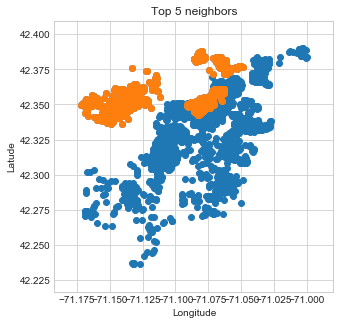

<Figure size 432x288 with 0 Axes>

In [35]:
# Scatter plot by location

# base concentration
plt.figure(figsize = (5,5))
plt.scatter( 'longitude', 'latitude', data =df_listing  )
plt.title("Distribution by location")
plt.xlabel("Longitude")
plt.ylabel("Latude")

# Highlight the top neighborbood
# plt.figure(figsize = (5,5))
plt.scatter( 'longitude', 'latitude', data =topneighborlist  )
plt.title("Top 5 neighbors")
plt.xlabel("Longitude")
plt.ylabel("Latude")
#plt.annotate('Allston', xy=(42.352, -71.135), xytext=(1, 2) )
plt.show() 
plt.savefig('topneighborhood.png')

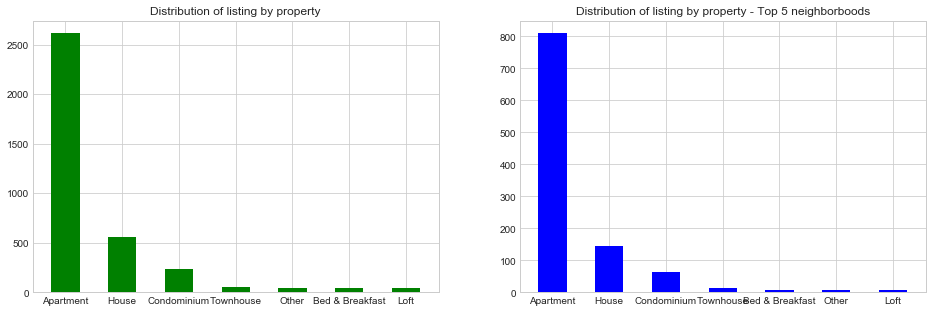

In [36]:
# Concentration by property type

 
propertydist = df_listing.groupby(['property_type_grouped'])['listing_id'].count().reset_index()
propertydist.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
propertydist = propertydist.sort_values(['total_listings'], ascending = False)

# check top neighbors
propertydist_top = topneighborlist.groupby(['property_type_grouped'])['listing_id'].count().reset_index()
propertydist_top.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
propertydist_top = propertydist_top.sort_values(['total_listings'], ascending = False)

# plot
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
#fig.suptitle('Distribution of listing by property')
width = 0.5

ax1.set_title('Distribution of listing by property')
ax1.bar(  'property_type_grouped', 'total_listings' , data =propertydist, color = 'green' , width = width)

ax2.set_title('Distribution of listing by property - Top 5 neighborboods')
ax2.bar( 'property_type_grouped', 'total_listings' , data =propertydist_top, color = 'blue' , width = width)


plt.savefig('property.png')

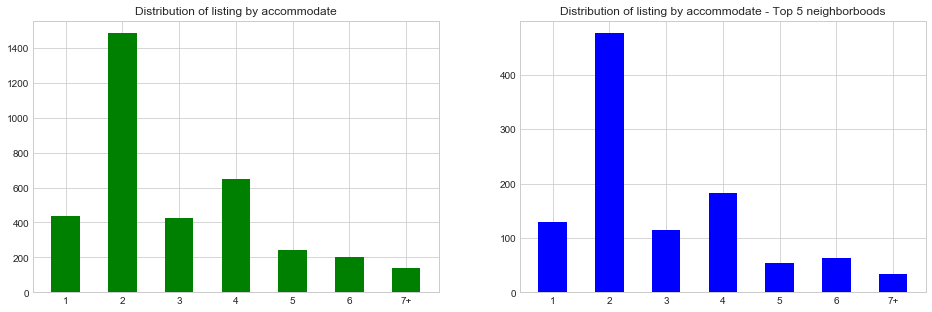

In [37]:
# Concentration by accommodate
 
accommodatedist = df_listing.groupby(['accommodates_cleansed'])['listing_id'].count().reset_index()
accommodatedist.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
#accommodatedist = accommodatedist.sort_values(['total_listings'], ascending = False)
 
# check top neighbors
accommodatedist_top = topneighborlist.groupby(['accommodates_cleansed'])['listing_id'].count().reset_index()
accommodatedist_top.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
#accommodatedist_top = accommodatedist_top.sort_values(['total_listings'], ascending = False)

# # plot
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
#fig.suptitle('Distribution of listing by accommodate')
width = 0.5

ax1.set_title('Distribution of listing by accommodate')
ax1.bar(  'accommodates_cleansed', 'total_listings' , data =accommodatedist, color = 'green' , width = width)

ax2.set_title('Distribution of listing by accommodate - Top 5 neighborboods')
ax2.bar( 'accommodates_cleansed', 'total_listings' , data =accommodatedist_top, color = 'blue' , width = width)


plt.savefig('accommodate.png')


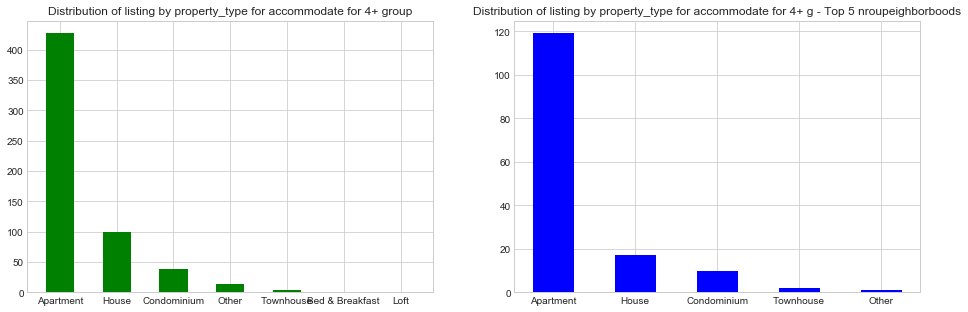

In [38]:
# Concentration by accommodate >=4
 
accommodatedist_g4 = df_listing[df_listing['accommodates_cleansed'].isin([ '5', '6', '7+'])].groupby(['property_type_grouped'])['listing_id'].count().reset_index()
accommodatedist_g4.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
accommodatedist_g4 = accommodatedist_g4.sort_values(['total_listings'], ascending = False)
 
# check top neighbors
accommodatedist_g4_top = topneighborlist[topneighborlist['accommodates_cleansed'].isin([ '5', '6', '7+'])].groupby(['property_type_grouped'])['listing_id'].count().reset_index()
accommodatedist_g4_top.rename(columns = {'listing_id' : 'total_listings'} , inplace = True )
accommodatedist_g4_top = accommodatedist_g4_top.sort_values(['total_listings'], ascending = False)
 
# # plot
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
#fig.suptitle('Distribution of listing by accommodate')
width = 0.5

ax1.set_title('Distribution of listing by property_type for accommodate for 4+ group')
ax1.bar(  'property_type_grouped', 'total_listings' , data =accommodatedist_g4, color = 'green' , width = width)

ax2.set_title('Distribution of listing by property_type for accommodate for 4+ g - Top 5 nroupeighborboods')
ax2.bar( 'property_type_grouped', 'total_listings' , data =accommodatedist_g4_top, color = 'blue' , width = width)


plt.savefig('accommodate_g4.png')

### Question 2: When to go?  popular season and weekday
### Source table: calendar
#### Finding:
#1. From Oct to Dec in 2016, listings in market was increasing constantly and significantly
#2. Two sharp drops over the year: Jan and March 
#3. Weekday/weenend does not impact  
#4. Allston always has the lower the available rate


In [41]:
# combine with neighborhood 

listneighbor = df_listing[['listing_id', 'neighbourhood_cleansed_grouped', 'property_type_grouped', 'minimum_nights','accommodates_cleansed' ]]
df_calendar = df_calendar.dodf_calendardf_calendar = df_calendar.merge(listneighbor, how = 'left', on = 'listing_id')
df_calendar.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,listing_id,date,available,price_cleansed,month,weekday,available_count,weekday_id,neighbourhood_cleansed_grouped,property_type_grouped,minimum_nights,accommodates_cleansed
0,12147973,2017-09-05,f,NaN,9,Tuesday,0,2,Roslindale,House,2,4
1,12147973,2017-09-04,f,NaN,9,Monday,0,1,Roslindale,House,2,4
2,12147973,2017-09-03,f,NaN,9,Sunday,0,0,Roslindale,House,2,4
3,12147973,2017-09-02,f,NaN,9,Saturday,0,6,Roslindale,House,2,4
4,12147973,2017-09-01,f,NaN,9,Friday,0,5,Roslindale,House,2,4


In [44]:
# check in top 
topneighborname = ['Allston', 'Back Bay', 'Beacon Hill', 'Brighton','Charlestown' ]

df_calendar_Allston = df_calendar[df_calendar['neighbourhood_cleansed_grouped'] == 'Allston']
df_calendar_BackBay = df_calendar[df_calendar['neighbourhood_cleansed_grouped'] == 'Back Bay']
df_calendar_BeaconHill = df_calendar[df_calendar['neighbourhood_cleansed_grouped'] == 'Beacon Hill']
df_calendar_Brighton = df_calendar[df_calendar['neighbourhood_cleansed_grouped'] == 'Brighton']
df_calendar_Charlestown = df_calendar[df_calendar['neighbourhood_cleansed_grouped'] == 'Charlestown']


In [45]:
# check availability

ava_dist = df_calendar.groupby(['date'])['available_count'].sum().reset_index()
ava_dist['total'] = df_calendar['listing_id'].nunique() 
ava_dist['available_rate'] = ava_dist['available_count']/ava_dist['total'] 
ava_dist.head()


,date,available_count,total,available_rate
0,2016-09-06,570,3585,0.158996
1,2016-09-07,932,3585,0.259972
2,2016-09-08,998,3585,0.278382
3,2016-09-09,981,3585,0.273640
4,2016-09-10,955,3585,0.266388


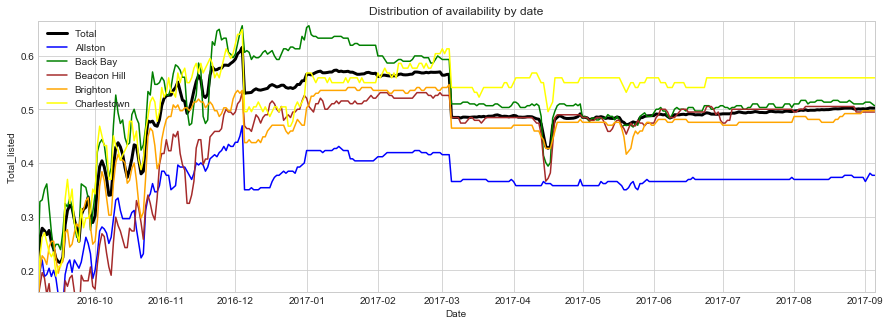

<Figure size 432x288 with 0 Axes>

In [46]:
# check availability by date

# total

ava_dist = df_calendar.groupby(['date'])['available_count'].sum().reset_index()
ava_dist['total'] = df_calendar['listing_id'].nunique() 
ava_dist['available_rate'] = ava_dist['available_count']/ava_dist['total'] 
#ava_dist.head()
    
# top neighborhood
 
ava_dist_Allston = df_calendar_Allston.groupby(['date'])['available_count'].sum().reset_index()
ava_dist_Allston['total'] = df_calendar_Allston['listing_id'].nunique() 
ava_dist_Allston['available_rate'] = ava_dist_Allston['available_count']/ava_dist_Allston['total'] 
 
ava_dist_BackBay = df_calendar_BackBay.groupby(['date'])['available_count'].sum().reset_index()
ava_dist_BackBay['total'] = df_calendar_BackBay['listing_id'].nunique() 
ava_dist_BackBay['available_rate'] = ava_dist_BackBay['available_count']/ava_dist_BackBay['total'] 

ava_dist_BeaconHill = df_calendar_BeaconHill.groupby(['date'])['available_count'].sum().reset_index()
ava_dist_BeaconHill['total'] = df_calendar_BeaconHill['listing_id'].nunique() 
ava_dist_BeaconHill['available_rate'] = ava_dist_BeaconHill['available_count']/ava_dist_BeaconHill['total'] 

ava_dist_Brighton = df_calendar_Brighton.groupby(['date'])['available_count'].sum().reset_index()
ava_dist_Brighton['total'] = df_calendar_Brighton['listing_id'].nunique() 
ava_dist_Brighton['available_rate'] = ava_dist_Brighton['available_count']/ava_dist_Brighton['total'] 

ava_dist_Charlestown = df_calendar_Charlestown.groupby(['date'])['available_count'].sum().reset_index()
ava_dist_Charlestown['total'] = df_calendar_Charlestown['listing_id'].nunique() 
ava_dist_Charlestown['available_rate'] = ava_dist_Charlestown['available_count']/ava_dist_Charlestown['total'] 


# plot

plt.figure(figsize = (15,5))
plt.plot('date', 'available_rate' , data = ava_dist, color = 'black', label = 'Total', linewidth=3.0  )
plt.title("Distribution of availability by date")
plt.xlabel("Date")
plt.ylabel("Total_listed")
plt.axis((ava_dist['date'].min(), ava_dist['date'].max(),ava_dist['available_rate'].min(),ava_dist['available_rate'].max()+0.05))
  

plt.plot('date', 'available_rate' , data = ava_dist_Allston, color = 'blue',  label = 'Allston'  )
plt.plot('date', 'available_rate' , data = ava_dist_BackBay, color = 'green', label = 'Back Bay'  )
plt.plot('date', 'available_rate' , data = ava_dist_BeaconHill, color = 'brown', label = 'Beacon Hill'  )
plt.plot('date', 'available_rate' , data = ava_dist_Brighton, color = 'orange', label = 'Brighton'  )    
plt.plot('date', 'available_rate' , data = ava_dist_Charlestown, color = 'yellow', label = 'Charlestown'  )

plt.legend(loc = "upper left") 
plt.show()
plt.savefig('Availablilty by date and neighborhood.png')


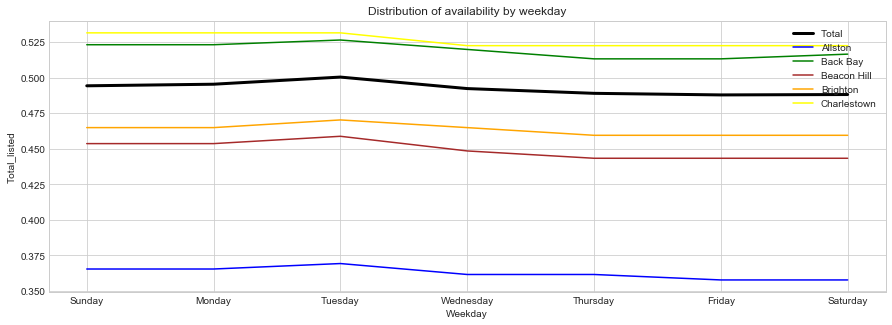

<Figure size 432x288 with 0 Axes>

In [47]:
#  check availability  by weekday

# total

nbweeks = round((df_calendar['date'].max() - df_calendar['date'].min()).days / 7, 1)

ava_dist_weekday = df_calendar.groupby(['weekday_id', 'weekday'])['available_count'].sum().reset_index()
ava_dist_weekday['available_count'] = round(ava_dist_weekday['available_count']/nbweeks,0)
ava_dist_weekday['total'] = df_calendar['listing_id'].nunique() 
ava_dist_weekday['available_rate'] = ava_dist_weekday['available_count']/ava_dist['total'] 
#ava_dist_weekday.head()
    
# top neighborhood
 
ava_dist_weekday_Allston = df_calendar_Allston.groupby(['weekday_id', 'weekday'])['available_count'].sum().reset_index()
ava_dist_weekday_Allston['available_count'] = round(ava_dist_weekday_Allston['available_count']/nbweeks,0)
ava_dist_weekday_Allston['total'] = df_calendar_Allston['listing_id'].nunique() 
ava_dist_weekday_Allston['available_rate'] = ava_dist_weekday_Allston['available_count']/ava_dist_weekday_Allston['total'] 
 
ava_dist_weekday_BackBay = df_calendar_BackBay.groupby(['weekday_id', 'weekday'])['available_count'].sum().reset_index()
ava_dist_weekday_BackBay['available_count'] = round(ava_dist_weekday_BackBay['available_count']/nbweeks,0)
ava_dist_weekday_BackBay['total'] = df_calendar_BackBay['listing_id'].nunique() 
ava_dist_weekday_BackBay['available_rate'] = ava_dist_weekday_BackBay['available_count']/ava_dist_weekday_BackBay['total'] 

ava_dist_weekday_BeaconHill = df_calendar_BeaconHill.groupby(['weekday_id', 'weekday'])['available_count'].sum().reset_index()
ava_dist_weekday_BeaconHill['available_count'] = round(ava_dist_weekday_BeaconHill['available_count']/nbweeks,0)
ava_dist_weekday_BeaconHill['total'] = df_calendar_BeaconHill['listing_id'].nunique() 
ava_dist_weekday_BeaconHill['available_rate'] = ava_dist_weekday_BeaconHill['available_count']/ava_dist_weekday_BeaconHill['total'] 

ava_dist_weekday_Brighton = df_calendar_Brighton.groupby(['weekday_id', 'weekday'])['available_count'].sum().reset_index()
ava_dist_weekday_Brighton['available_count'] = round(ava_dist_weekday_Brighton['available_count']/nbweeks,0)
ava_dist_weekday_Brighton['total'] = df_calendar_Brighton['listing_id'].nunique() 
ava_dist_weekday_Brighton['available_rate'] = ava_dist_weekday_Brighton['available_count']/ava_dist_weekday_Brighton['total'] 

ava_dist_weekday_Charlestown = df_calendar_Charlestown.groupby(['weekday_id', 'weekday'])['available_count'].sum().reset_index()
ava_dist_weekday_Charlestown['available_count'] = round(ava_dist_weekday_Charlestown['available_count']/nbweeks,0)
ava_dist_weekday_Charlestown['total'] = df_calendar_Charlestown['listing_id'].nunique() 
ava_dist_weekday_Charlestown['available_rate'] = ava_dist_weekday_Charlestown['available_count']/ava_dist_weekday_Charlestown['total'] 


# plot

plt.figure(figsize = (15,5))
plt.plot('weekday', 'available_rate' , data = ava_dist_weekday, color = 'black', label = 'Total', linewidth=3.0  )
plt.title("Distribution of availability by weekday")
plt.xlabel("Weekday")
plt.ylabel("Total_listed")

plt.plot('weekday', 'available_rate' , data = ava_dist_weekday_Allston, color = 'blue', label = 'Allston'  )
plt.plot('weekday', 'available_rate' , data = ava_dist_weekday_BackBay, color = 'green', label = 'Back Bay'  )
plt.plot('weekday', 'available_rate' , data = ava_dist_weekday_BeaconHill, color = 'brown', label = 'Beacon Hill'  )
plt.plot('weekday', 'available_rate' , data = ava_dist_weekday_Brighton, color = 'orange', label = 'Brighton'  )    
plt.plot('weekday', 'available_rate' , data = ava_dist_weekday_Charlestown, color = 'yellow', label = 'Charlestown'  )

plt.legend(loc= "upper right") 
plt.show()
plt.savefig('Availablilty by weekday.png')

### Question 3: What to expect? Price and discount
#### Source Table: Calendar, Listing and Reviews
#### Finding:
#1. Sep -Dec highest price across the year
#2. Price wend down after Sep till Dec, and stable, and slighly increasing since May.  Middle April had spike could due to Spring break
#3.  


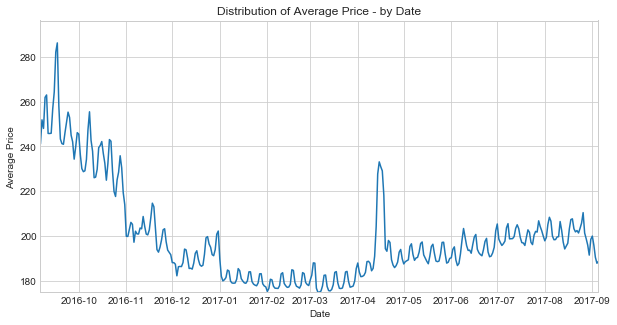

<Figure size 432x288 with 0 Axes>

In [48]:
# Average price for each date

df_calendar_avgprice = df_calendar.groupby(by = ['date'])['price_cleansed'].mean().reset_index()

plt.figure(figsize = (10, 5))
plt.plot( 'date', 'price_cleansed', data =df_calendar_avgprice )
plt.title("Distribution of Average Price - by Date")
plt.xlabel("Date")
plt.ylabel("Average Price") 
plt.axis((df_calendar_avgprice['date'].min(), df_calendar_avgprice['date'].max(),df_calendar_avgprice[df_calendar_avgprice['price_cleansed'].notnull()]['price_cleansed'].min(),df_calendar_avgprice[df_calendar_avgprice['price_cleansed'].notnull()]['price_cleansed'].max()+10))
 
plt.show()
plt.savefig('Average Price by date.png')

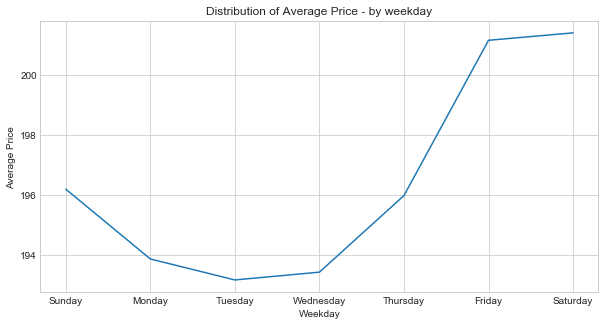

<Figure size 432x288 with 0 Axes>

In [49]:
# Average price for each date

df_calendar_avgprice_weekday = df_calendar.groupby(by = ['weekday_id', 'weekday'])['price_cleansed'].mean().reset_index()

plt.figure(figsize = (10, 5))
plt.plot( 'weekday', 'price_cleansed', data =df_calendar_avgprice_weekday )
plt.title("Distribution of Average Price - by weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Price") 
  
plt.show()
plt.savefig('Average Price by weekday.png')

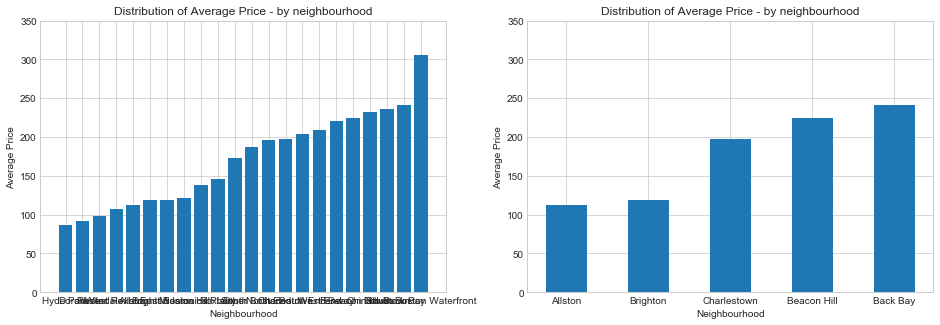

<Figure size 432x288 with 0 Axes>

In [51]:
# price by neighborhood

df_listing_avgprice_neighbourhood = df_listing.groupby(by = ['neighbourhood_cleansed_grouped'])['list_price_cleansed'].mean().reset_index()
df_listing_avgprice_neighbourhood = df_listing_avgprice_neighbourhood.sort_values(by = ['list_price_cleansed'])
 
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1.bar( 'neighbourhood_cleansed_grouped', 'list_price_cleansed', data = df_listing_avgprice_neighbourhood )
ax1.set_title("Distribution of Average Price - by neighbourhood")
ax1.set_xlabel("Neighbourhood" )
ax1.set_ylabel("Average Price") 
ax1.set_ylim([0,350]) 

df_listing_avgprice_neighbourhood_top = topneighborlist.groupby(by = ['neighbourhood_cleansed_grouped'])['list_price_cleansed'].mean().reset_index()
df_listing_avgprice_neighbourhood_top = df_listing_avgprice_neighbourhood_top.sort_values(by = ['list_price_cleansed'])
width = 0.5 
ax2.bar( 'neighbourhood_cleansed_grouped', 'list_price_cleansed', data = df_listing_avgprice_neighbourhood_top , width = width )
ax2.set_title("Distribution of Average Price - by neighbourhood")
ax2.set_xlabel("Neighbourhood")
ax2.set_ylabel("Average Price") 
ax2.set_ylim([0,350])
plt.show()
plt.savefig('Average Price by neighbourhood.png')


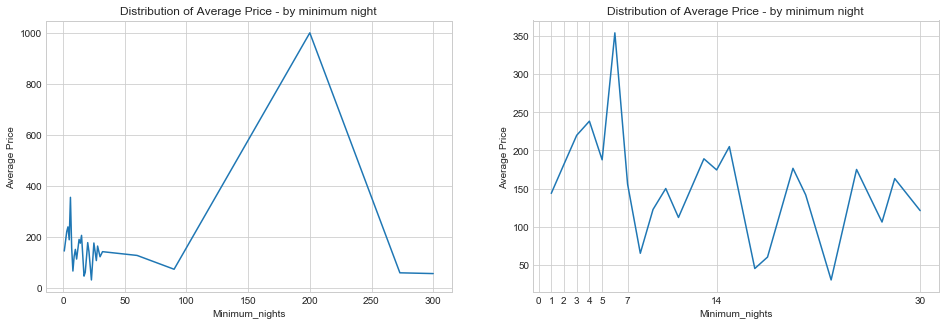

<Figure size 432x288 with 0 Axes>

In [55]:
# price by minimum night

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

df_listing_avgprice_minight = df_listing.groupby(by = ['minimum_nights'])['list_price_cleansed'].mean().reset_index()
 
ax1.plot( 'minimum_nights', 'list_price_cleansed', data = df_listing_avgprice_minight )
ax1.set_title("Distribution of Average Price - by minimum night")
ax1.set_xlabel("Minimum_nights")
ax1.set_ylabel("Average Price") 
ax2.set_xticks([0,1,2,7, 30,50,100,200,300]) 

# min nights  < 30
df_listing_avgprice_minight30 = df_listing[df_listing['minimum_nights']<= 30].groupby(by = ['minimum_nights'])['list_price_cleansed'].mean().reset_index()
 
ax2.plot( 'minimum_nights', 'list_price_cleansed', data = df_listing_avgprice_minight30 )
ax2.set_title("Distribution of Average Price - by minimum night")
ax2.set_xlabel("Minimum_nights")
ax2.set_ylabel("Average Price") 
ax2.set_xticks([0,1,2,3,4,5,7,14,30]) 

plt.show()
plt.savefig('Average Price by minimum_nights.png')

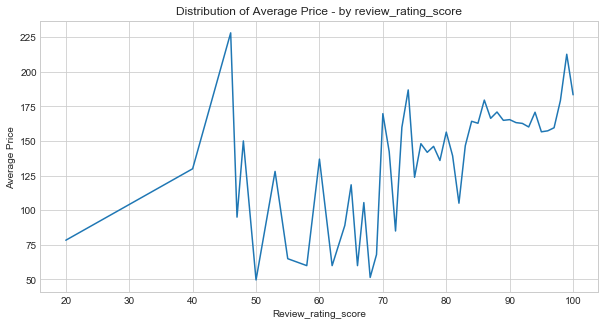

<Figure size 432x288 with 0 Axes>

In [56]:
# price by rating

df_listing_avgprice_rating = df_listing.groupby(by = ['review_scores_rating'])['list_price_cleansed'].mean().reset_index()

plt.figure(figsize = (10, 5)) 
plt.plot( 'review_scores_rating', 'list_price_cleansed', data = df_listing_avgprice_rating  )
plt.title("Distribution of Average Price - by review_rating_score")
plt.xlabel("Review_rating_score")
plt.ylabel("Average Price") 
  
plt.show()
plt.savefig('Average Price by review rating.png')

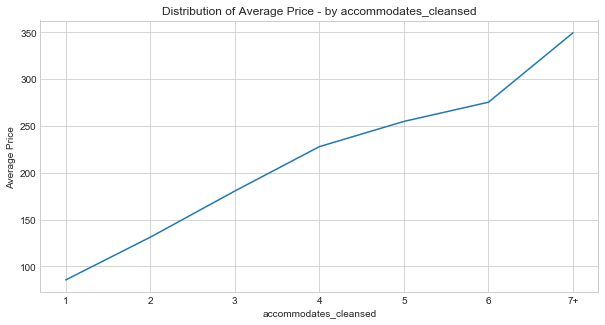

<Figure size 432x288 with 0 Axes>

In [57]:
# price by accomnodies - no use

df_listing_avgprice_rating = df_listing.groupby(by = ['accommodates_cleansed'])['list_price_cleansed'].mean().reset_index()

plt.figure(figsize = (10, 5)) 
plt.plot( 'accommodates_cleansed', 'list_price_cleansed', data = df_listing_avgprice_rating  )
plt.title("Distribution of Average Price - by accommodates_cleansed")
plt.xlabel("accommodates_cleansed")
plt.ylabel("Average Price") 
  
plt.show()
plt.savefig('Average Price by accommodates_cleansed.png') 

# DONE.